IMPROVED WAVEGUIDE GEOMETRY VISUALIZATION
CORRECTED Layer Structure (Top to Bottom):
1. Cu Waveguides (3.0 μm) - Top Layer
2. SiO₂ BOX (2.0 μm) - Second Layer
3. Poly-Si (0.5 μm) - Third Layer
4. Si Substrate (200.0 μm) - Bottom Layer


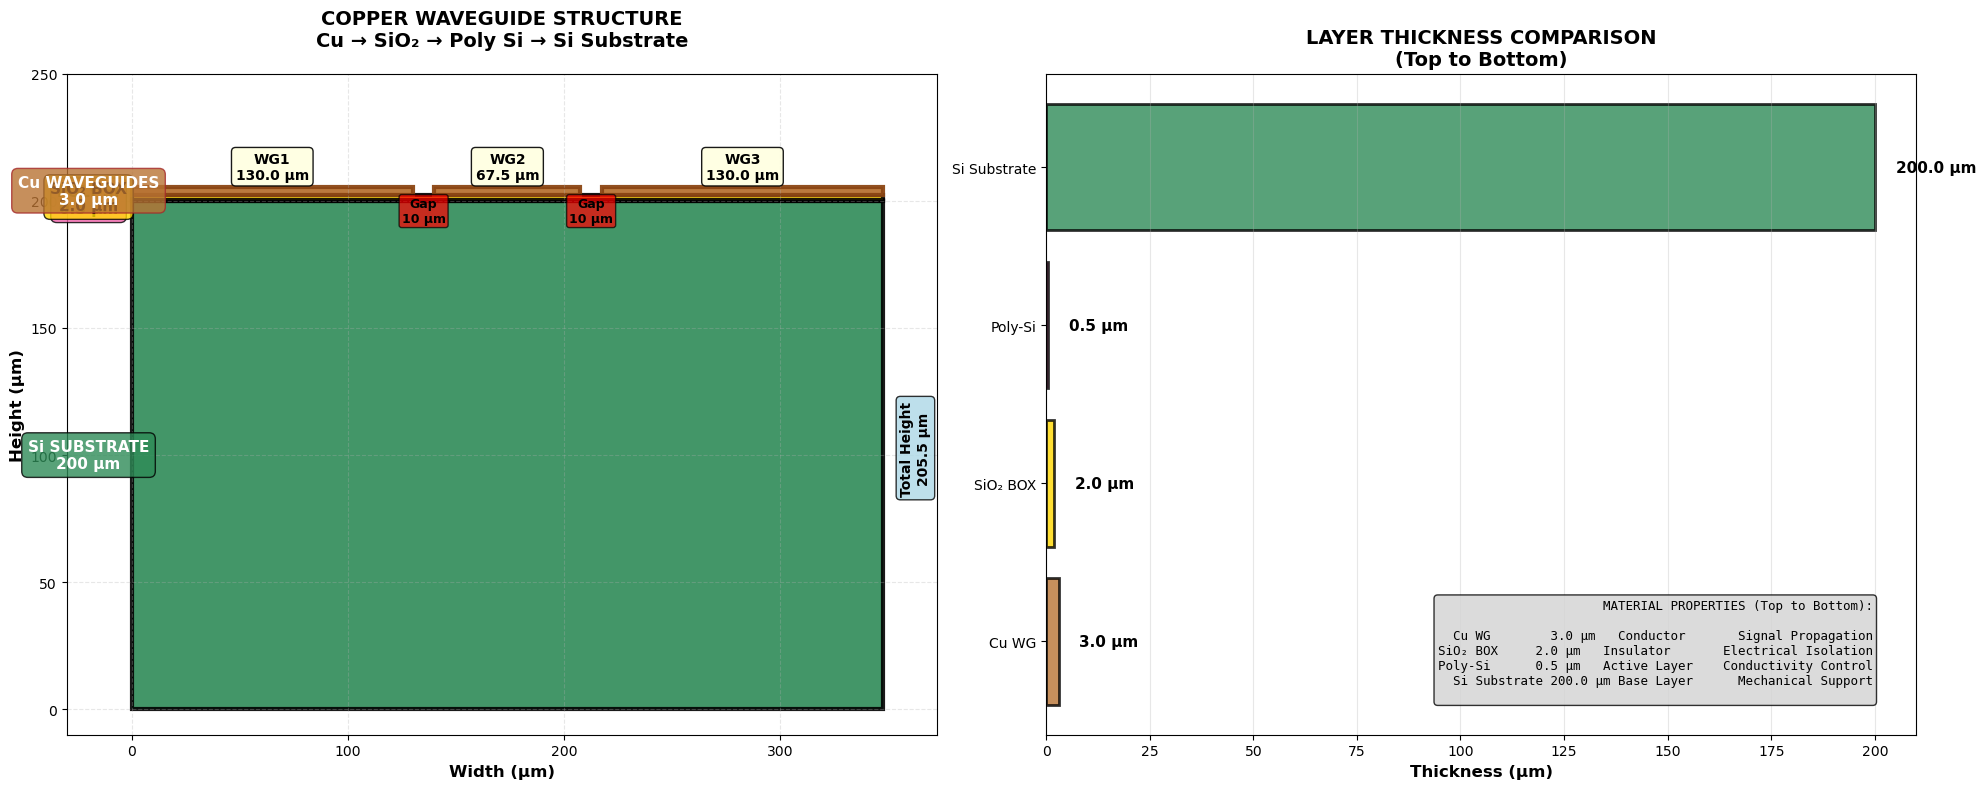

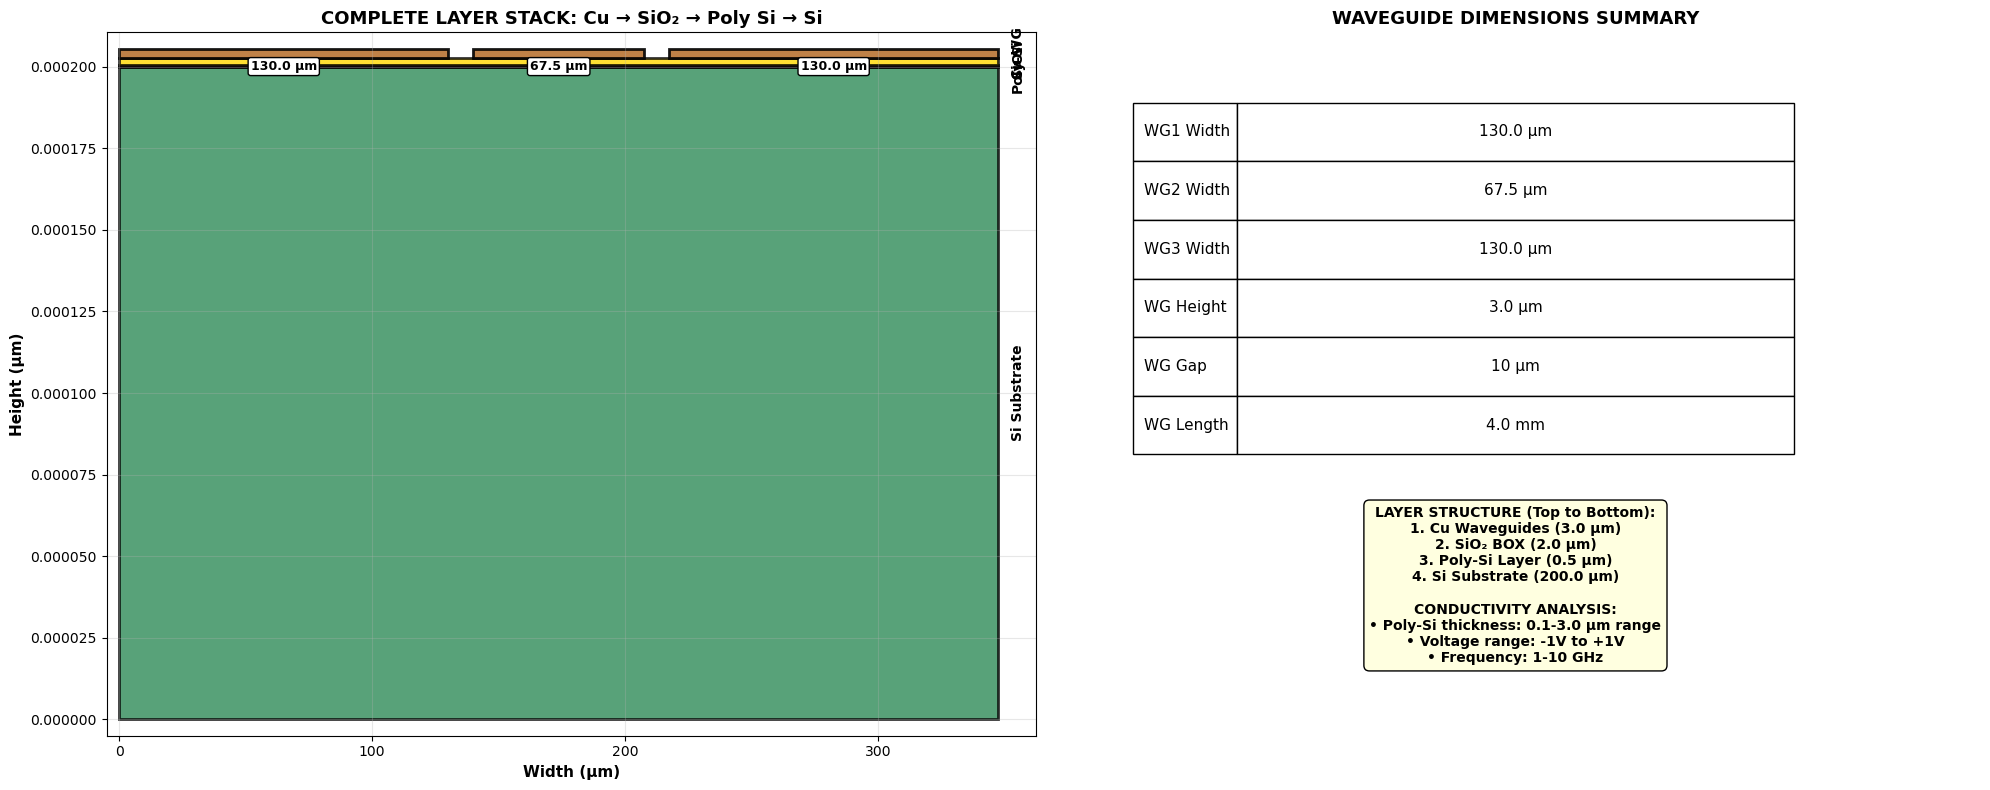

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, epsilon_0, mu_0
import matplotlib.patches as patches

class ImprovedWaveguideGeometry:
    def __init__(self):
        # Copper Waveguide dimensions
        self.W1 = 130e-6
        self.W2 = 67.5e-6  # Middle value from range
        self.W3 = 130e-6
        self.H = 3e-6
        self.L = 4e-3
        self.gap = 10e-6
        
        # Layer thicknesses - CORRECTED ORDER: Cu waveguides → SiO₂ → Poly Si → Si substrate (bottom)
        self.t_box = 2e-6
        self.t_polysi = 0.5e-6
        self.t_si = 200e-6

    def plot_improved_geometry(self):
        """Plot improved geometry with clear layer structure"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Enhanced color scheme
        colors = {
            'si': '#2E8B57',      # Sea Green - Silicon
            'sio2': '#FFD700',    # Gold - SiO2
            'polysi': '#FF69B4',  # Hot Pink - Poly Silicon
            'cu_wg': '#B87333'    # Copper - Waveguides
        }
        
        # Calculate dimensions
        total_width = self.W1 + self.gap + self.W2 + self.gap + self.W3
        
        # CORRECTED LAYER ORDER: Cu waveguides → SiO₂ → Poly Si → Si substrate (bottom)
        # Calculate base heights for each layer
        cu_wg_base = self.t_si + self.t_polysi + self.t_box  # Cu waveguides on top
        sio2_base = self.t_si + self.t_polysi  # SiO₂ under Cu
        polysi_base = self.t_si  # Poly Si under SiO₂
        si_base = 0  # Si substrate at bottom
        
        total_height = cu_wg_base + self.H
        
        # Plot 1: MAIN STRUCTURE - CORRECTED LAYER ORDER
        
        # 1. Silicon Substrate (BOTTOM LAYER)
        si_rect = patches.Rectangle((0, si_base), total_width, self.t_si,
                                  facecolor=colors['si'], alpha=0.9, 
                                  edgecolor='black', linewidth=3)
        ax1.add_patch(si_rect)
        
        # 2. Poly-Si Layer (SECOND LAYER)
        polysi_rect = patches.Rectangle((0, polysi_base), total_width, self.t_polysi,
                                       facecolor=colors['polysi'], alpha=0.9,
                                       edgecolor='black', linewidth=3)
        ax1.add_patch(polysi_rect)
        
        # 3. SiO₂ BOX Layer (THIRD LAYER)
        sio2_rect = patches.Rectangle((0, sio2_base), total_width, self.t_box,
                                     facecolor=colors['sio2'], alpha=0.9,
                                     edgecolor='black', linewidth=3)
        ax1.add_patch(sio2_rect)
        
        # 4. COPPER WAVEGUIDES (TOP LAYER)
        wg_positions = [
            (0, self.W1, 'WG1'),
            (self.W1 + self.gap, self.W2, 'WG2'),
            (self.W1 + self.gap + self.W2 + self.gap, self.W3, 'WG3')
        ]
        
        for x_start, width, label in wg_positions:
            wg_rect = patches.Rectangle((x_start, cu_wg_base), width, self.H,
                                      facecolor=colors['cu_wg'], alpha=0.95,
                                      edgecolor='#8B4513', linewidth=3)
            ax1.add_patch(wg_rect)
        
        # ADD CLEAN LABELS WITHOUT OVERLAPPING
        
        # Layer labels on LEFT SIDE with proper spacing - CORRECTED ORDER
        layer_labels = [
            (si_base + self.t_si/2, 'Si SUBSTRATE', f'{self.t_si*1e6:.0f} μm', colors['si']),
            (polysi_base + self.t_polysi/2, 'POLY-SI', f'{self.t_polysi*1e6:.1f} μm', colors['polysi']),
            (sio2_base + self.t_box/2, 'SiO₂ BOX', f'{self.t_box*1e6:.1f} μm', colors['sio2'])
        ]
        
        for y_pos, name, thickness, color in layer_labels:
            ax1.text(-20e-6, y_pos, f'{name}\n{thickness}', 
                    ha='center', va='center', fontweight='bold', fontsize=11,
                    bbox=dict(boxstyle="round,pad=0.4", facecolor=color, alpha=0.8, edgecolor='black'),
                    color='white' if color == colors['si'] else 'black')
        
        # Cu Waveguide label on left side
        ax1.text(-20e-6, cu_wg_base + self.H/2, f'Cu WAVEGUIDES\n{self.H*1e6:.1f} μm', 
                ha='center', va='center', fontweight='bold', fontsize=11,
                bbox=dict(boxstyle="round,pad=0.4", facecolor=colors['cu_wg'], alpha=0.8, edgecolor='brown'),
                color='white')
        
        # Waveguide labels ABOVE waveguides
        for x_start, width, label in wg_positions:
            label_text = f'{label}\n{width*1e6:.1f} μm'
            ax1.text(x_start + width/2, cu_wg_base + self.H + 2e-6, label_text,
                    ha='center', va='bottom', fontweight='bold', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.9, edgecolor='black'))
        
        # Gap annotations BELOW waveguides
        gap_positions = [self.W1, self.W1 + self.gap + self.W2]
        for x_pos in gap_positions:
            ax1.text(x_pos + self.gap/2, cu_wg_base - 1e-6, f'Gap\n{self.gap*1e6:.0f} μm',
                    ha='center', va='top', fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="red", alpha=0.7))
        
        # Total structure height annotation
        ax1.text(total_width + 15e-6, total_height/2, f'Total Height\n{total_height*1e6:.1f} μm',
                ha='center', va='center', fontweight='bold', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8),
                rotation=90)
        
        # Configure main plot
        ax1.set_xlabel('Width (μm)', fontweight='bold', fontsize=12)
        ax1.set_ylabel('Height (μm)', fontweight='bold', fontsize=12)
        ax1.set_title('COPPER WAVEGUIDE STRUCTURE\nCu → SiO₂ → Poly Si → Si Substrate', 
                     fontweight='bold', fontsize=14, pad=20)
        ax1.grid(True, alpha=0.3, linestyle='--')
        
        # Set axis limits with generous margins
        ax1.set_xlim(-30e-6, total_width + 25e-6)
        ax1.set_ylim(-10e-6, total_height + 10e-6)
        
        # Convert axes to micrometers for better readability
        x_ticks = np.arange(0, total_width + 50e-6, 100e-6)
        ax1.set_xticks(x_ticks)
        ax1.set_xticklabels([f'{x*1e6:.0f}' for x in x_ticks])
        
        y_ticks = np.arange(0, total_height + 50e-6, 50e-6)
        ax1.set_yticks(y_ticks)
        ax1.set_yticklabels([f'{y*1e6:.0f}' for y in y_ticks])
        
        # Plot 2: LAYER THICKNESS COMPARISON - CORRECTED ORDER
        layers = ['Cu WG', 'SiO₂ BOX', 'Poly-Si', 'Si Substrate']
        thicknesses = [self.H*1e6, self.t_box*1e6, self.t_polysi*1e6, self.t_si*1e6]
        layer_colors = [colors['cu_wg'], colors['sio2'], colors['polysi'], colors['si']]
        
        bars = ax2.barh(layers, thicknesses, color=layer_colors, alpha=0.8, edgecolor='black', linewidth=2)
        ax2.set_xlabel('Thickness (μm)', fontweight='bold', fontsize=12)
        ax2.set_title('LAYER THICKNESS COMPARISON\n(Top to Bottom)', fontweight='bold', fontsize=14)
        ax2.grid(True, alpha=0.3, axis='x')
        
        # Add value labels on bars
        for bar, thickness in zip(bars, thicknesses):
            width = bar.get_width()
            ax2.text(width + 5, bar.get_y() + bar.get_height()/2, 
                    f'{thickness:.1f} μm', ha='left', va='center', fontweight='bold', fontsize=11)
        
        # Add material properties table - CORRECTED ORDER
        table_data = [
            ['Cu WG', '3.0 μm', 'Conductor', 'Signal Propagation'],
            ['SiO₂ BOX', '2.0 μm', 'Insulator', 'Electrical Isolation'],
            ['Poly-Si', '0.5 μm', 'Active Layer', 'Conductivity Control'],
            ['Si Substrate', '200.0 μm', 'Base Layer', 'Mechanical Support']
        ]
        
        # Create a text box with material properties
        props = dict(boxstyle='round', facecolor='lightgray', alpha=0.8)
        table_text = 'MATERIAL PROPERTIES (Top to Bottom):\n\n'
        for row in table_data:
            table_text += f'{row[0]:<12} {row[1]:<8} {row[2]:<15} {row[3]}\n'
        
        ax2.text(0.95, 0.05, table_text, transform=ax2.transAxes, fontsize=9,
                verticalalignment='bottom', horizontalalignment='right',
                bbox=props, fontfamily='monospace')
        
        plt.tight_layout()
        plt.show()

    def plot_detailed_cross_section(self):
        """Plot detailed cross-section view with corrected layer order"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        colors = {
            'si': '#2E8B57', 'sio2': '#FFD700', 
            'polysi': '#FF69B4', 'cu_wg': '#B87333'
        }
        
        total_width = self.W1 + self.gap + self.W2 + self.gap + self.W3
        
        # CORRECTED LAYER ORDER
        cu_wg_base = self.t_si + self.t_polysi + self.t_box
        sio2_base = self.t_si + self.t_polysi
        polysi_base = self.t_si
        
        # Plot 1: Focus on complete layer stack
        # Draw all layers in correct order from bottom to top
        
        # Si Substrate (bottom)
        ax1.add_patch(patches.Rectangle((0, 0), total_width, self.t_si,
                                      facecolor=colors['si'], alpha=0.8, edgecolor='black', linewidth=2))
        
        # Poly-Si Layer
        ax1.add_patch(patches.Rectangle((0, polysi_base), total_width, self.t_polysi,
                                       facecolor=colors['polysi'], alpha=0.8, edgecolor='black', linewidth=2))
        
        # SiO₂ Layer
        ax1.add_patch(patches.Rectangle((0, sio2_base), total_width, self.t_box,
                                      facecolor=colors['sio2'], alpha=0.8, edgecolor='black', linewidth=2))
        
        # Draw Cu waveguides (top)
        wg_data = [
            (0, self.W1), (self.W1 + self.gap, self.W2), 
            (self.W1 + self.gap + self.W2 + self.gap, self.W3)
        ]
        
        for x_start, width in wg_data:
            ax1.add_patch(patches.Rectangle((x_start, cu_wg_base), width, self.H,
                                          facecolor=colors['cu_wg'], alpha=0.9, edgecolor='black', linewidth=2))
            
            # Width annotations
            ax1.text(x_start + width/2, cu_wg_base - 0.5e-6, f'{width*1e6:.1f} μm',
                    ha='center', va='top', fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="white"))
        
        # Layer labels on right side - CORRECTED ORDER
        label_x = total_width + 5e-6
        ax1.text(label_x, self.t_si/2, 'Si Substrate', 
                ha='left', va='center', fontweight='bold', fontsize=10, rotation=90)
        ax1.text(label_x, polysi_base + self.t_polysi/2, 'Poly-Si', 
                ha='left', va='center', fontweight='bold', fontsize=10, rotation=90)
        ax1.text(label_x, sio2_base + self.t_box/2, 'SiO₂', 
                ha='left', va='center', fontweight='bold', fontsize=10, rotation=90)
        ax1.text(label_x, cu_wg_base + self.H/2, 'Cu WG', 
                ha='left', va='center', fontweight='bold', fontsize=10, rotation=90)
        
        ax1.set_xlabel('Width (μm)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Height (μm)', fontweight='bold', fontsize=11)
        ax1.set_title('COMPLETE LAYER STACK: Cu → SiO₂ → Poly Si → Si', 
                     fontweight='bold', fontsize=13)
        ax1.grid(True, alpha=0.3)
        
        total_height = cu_wg_base + self.H
        ax1.set_xlim(-5e-6, total_width + 15e-6)
        ax1.set_ylim(-5e-6, total_height + 5e-6)
        
        ax1.set_xticks(np.arange(0, total_width + 50e-6, 100e-6))
        ax1.set_xticklabels([f'{x*1e6:.0f}' for x in np.arange(0, total_width + 50e-6, 100e-6)])
        
        # Plot 2: Dimension summary
        dimensions = {
            'WG1 Width': f'{self.W1*1e6:.1f} μm',
            'WG2 Width': f'{self.W2*1e6:.1f} μm', 
            'WG3 Width': f'{self.W3*1e6:.1f} μm',
            'WG Height': f'{self.H*1e6:.1f} μm',
            'WG Gap': f'{self.gap*1e6:.0f} μm',
            'WG Length': f'{self.L*1e3:.1f} mm'
        }
        
        ax2.axis('off')
        ax2.set_title('WAVEGUIDE DIMENSIONS SUMMARY', fontweight='bold', fontsize=13)
        
        # Create dimension table
        table = ax2.table(cellText=[[dimensions[key]] for key in dimensions],
                         rowLabels=list(dimensions.keys()),
                         cellLoc='center',
                         loc='center',
                         bbox=[0.2, 0.4, 0.6, 0.5])
        
        table.auto_set_font_size(False)
        table.set_fontsize(11)
        table.scale(1.5, 2.0)
        
        # Add note about layer structure
        note_text = ('LAYER STRUCTURE (Top to Bottom):\n'
                    '1. Cu Waveguides (3.0 μm)\n'
                    '2. SiO₂ BOX (2.0 μm)\n'
                    '3. Poly-Si Layer (0.5 μm)\n'
                    '4. Si Substrate (200.0 μm)\n\n'
                    'CONDUCTIVITY ANALYSIS:\n'
                    '• Poly-Si thickness: 0.1-3.0 μm range\n'
                    '• Voltage range: -1V to +1V\n' 
                    '• Frequency: 1-10 GHz')
        
        ax2.text(0.5, 0.1, note_text, transform=ax2.transAxes, fontsize=10,
                ha='center', va='bottom', fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.4", facecolor="lightyellow"))
        
        plt.tight_layout()
        plt.show()

# Create and run the improved geometry visualization
if __name__ == "__main__":
    print("IMPROVED WAVEGUIDE GEOMETRY VISUALIZATION")
    print("=" * 70)
    print("CORRECTED Layer Structure (Top to Bottom):")
    print("1. Cu Waveguides (3.0 μm) - Top Layer")
    print("2. SiO₂ BOX (2.0 μm) - Second Layer") 
    print("3. Poly-Si (0.5 μm) - Third Layer")
    print("4. Si Substrate (200.0 μm) - Bottom Layer")
    print("=" * 70)
    
    geometry = ImprovedWaveguideGeometry()
    geometry.plot_improved_geometry()
    geometry.plot_detailed_cross_section()